<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/Phys824_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance and Shot Noise of Pseudodiffusive and Diffusive Electron Transport Through Graphene Nanoribbons
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [1]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp38-cp38-linux_x86_64.whl size=4293456 sha256=b2c280761799004e3cb4cefe54c9f3bc9cdf159dced49cf7dd2c1eb353f634c8
  Stored in directory: /root/.cache/pip/wheels/6f/df/9e/c539998ebc40515fff5ab4a3254a8defafa218f89848e47de8
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp38-cp38-linux_x86_64.whl size=231235 sha256=28e8eaec5d2435c6f6cc402bd1340e3f9cc5b231233963185a6fcedfc030effd
  Stored in directory: /root/.cache/pip/wheels/60/fc/af/bd51765e167af783d7211176ba6da429472161b2462d4d5bc6
Successfully built kwant tinyarray


In [5]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/kwant/solvers/default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [6]:
# If using Google Colab Include
from google.colab import files

## Part I: Semi-infinite ZGNR with Leads

In [16]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices
gr_lat = kwant.lattice.honeycomb(a=2.46)
v1, v2 = gr_lat.prim_vecs 
t = -3
gate = 0.5
energy = 0.505

In [89]:
width = 100
length = .2 * width

def ribbon_sys(pos):
    x, y = pos
    return abs(x) < 0.5*length and abs(y) < 0.5*width

def ribbon_lead(pos):
    x, y = pos
    return abs(y) < 0.5*width 

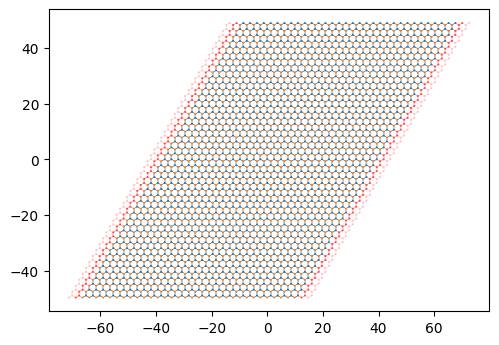

In [90]:
# Make graphene ribbon
sys = kwant.Builder()
sys[gr_lat.shape(ribbon_sys, (0, 0))] = gate
sys[gr_lat.neighbors(1)] = t
# Make leads
left_direction = kwant.TranslationalSymmetry(-v1)
left_lead = kwant.Builder(left_direction)
left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = t
# Attach leads
sys.attach_lead(left_lead)
sys.attach_lead(left_lead.reversed())
kwant.plot(sys, dpi=100);
# Finalize systems
sys = sys.finalized()
left_lead = left_lead.finalized()

Calculate the Conductance (σ) and the Fanofactor for the ZGNR

In [91]:
smatrix = kwant.smatrix(sys, energy)
np.random.seed(2) 
tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
tt = np.dot(tmat, tmat.conj().T)
evals = np.linalg.eigvals(tt)
print(evals)
num = 0
den = 0
for x in evals:
  den = den + x
  num = num + x*(1-x)
conductance = den.real # from lead 0->1
fano = (num/den).real
print(conductance, fano)

[0.99349403-1.43891951e-17j 0.40275066-5.04306566e-18j
 0.35268526-3.13310237e-18j 0.0105806 +8.23276871e-18j
 0.01004352+4.79161530e-18j]
1.769554063569262 0.2801360411412824


In [75]:
L_over_W = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
w50_conds = np.array([0.4462381657169239, 0.04473887344660933, 0.007496171923809065, 0.0018126766102726257, 0.0005234517880581903, 0.00015828552627827666])
w50_fanos = np.array([0.7767972368494136, 0.9772522314857331, 0.9962352742330622, 0.9990915017309743, 0.9997343710443929, 0.9999202567080804])
w100_conds = np.array([1.73369558456882, 1.0511411087677605, 0.9142122524353296, 0.8730576019743752, 0.8743751021693, 0.8618147550029748])
w100_fanos = np.array([0.3056562450381863, 0.21346157340566535, 0.1551844108333043, 0.14599312697567976, 0.13096778910709178, 0.13968701961026933])
w150_conds = np.array([1.7049184092437302, 0.5124970684360242, 0.17533852725474222, 0.06383342080455355, 0.022552787597318852, 0.006804707724796826])
w150_fanos = np.array([0.4510601420203352, 0.753256850661378, 0.8949560769203767, 0.9561454567253429, 0.9834109647311361, 0.9948246650457937])
w200_conds = np.array([])
w200_fanos = np.array([])

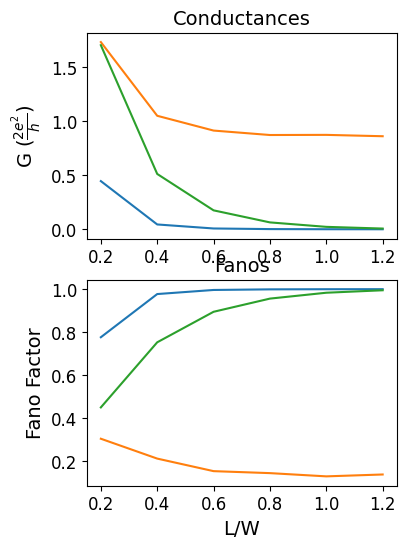

In [78]:
plt.figure(dpi=100,figsize=(4,6))
plt.subplot(211)
axes = plt.gca()
axes.set_title('Conductances', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(L_over_W, w50_conds);
plt.plot(L_over_W, w100_conds);
plt.plot(L_over_W, w150_conds);

plt.subplot(212)
axes = plt.gca()
axes.set_title('Fanos', fontsize=14)
axes.set_xlabel('L/W', fontsize=14)
axes.set_ylabel(r'Fano Factor', fontsize=14)
#axes.set_xlim(-5,5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(L_over_W, w50_fanos)
plt.plot(L_over_W, w100_fanos)
plt.plot(L_over_W, w150_fanos)